This is a sanity check, as well as usage demo, for the following estimators:
- MISED = Mean Integrated Square Error for Derivatives (i.e. Density Derivative Estimation)
- LSDDR = Least Squares Density Derivative Ratio (Estimation)

In [1]:
# Imports
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from MISEDpython.MISED import MISED_full as densderiv
from LSDDRpython.LSDDR_full import LSDDR_full as densderivratio

### MISED

In [3]:
# set the distribution
n = 1000
mu = 0.3
sigma = 0.7

# generate the data
t = np.linspace(-2, 2, 500)
X = np.random.normal(mu, sigma, n)

# Exact pdf
pt = stats.norm.pdf(t, loc=mu, scale=sigma)

# Exact density derivative
# (Formula is simple because of normal distribution!)
ddt = pt * (mu - t) / sigma**2

# Exact pdf at sample points
px = stats.norm.pdf(X, loc=mu, scale=sigma)

In [4]:
# Compute kernel approximation
kerdens = densderiv(X)
dhh = kerdens.compute_density_deriv(t)
print(dhh.shape)

dd=0, sigma=0.501187, lambda=0.562341
(1, 500)


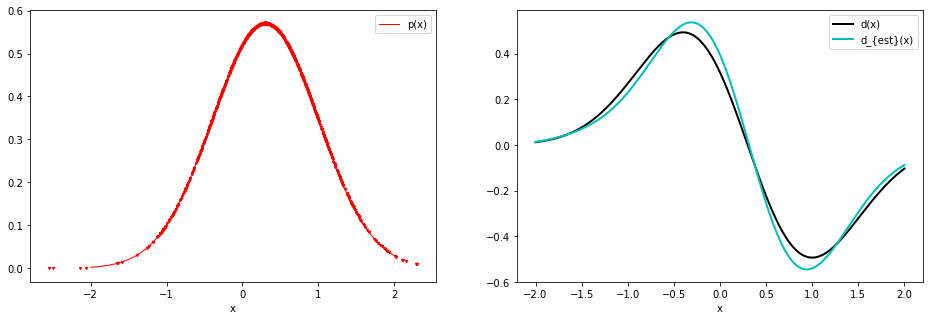

In [5]:
# draw the first figure: densities and samples
fig = plt.figure(figsize=(16,5))

ax1 = fig.add_subplot(1,2,1)

hl, = ax1.plot(t, pt, linewidth=1, color='r', zorder=1)

ax1.scatter(X, px, c=u'r', marker='v', s=5, zorder=2)

ax1.legend([hl], ['p(x)'])
plt.xlabel('x')

# draw the second figure: true and estimate density derivative
ax2 = fig.add_subplot(1,2,2)

hl3, = ax2.plot(t, ddt, linewidth=2, color='k')
hl4, = ax2.plot(t, dhh[0], linewidth=2, color='c')

ax2.legend([hl3, hl4], ['d(x)', 'd_{est}(x)' ])
plt.xlabel('x')

plt.show()

### LSDDR

In [6]:
# set the distribution
n = 1000
mu = 0.5
sigma = 0.7

# generate the data
t = np.linspace(-1, 2, 500)
X = np.random.normal(mu, sigma, n)

# Exact pdf
pt = stats.norm.pdf(t, loc=mu, scale=sigma)

# Exact density derivative ratio
# (Formula is simple because of normal distribution!)
ddt = (mu - t) / sigma**2

# Exact pdf at sample points
px = stats.norm.pdf(X, loc=mu, scale=sigma)

In [7]:
# Compute kernel approximation
kerdens = densderivratio(X)
dhh = kerdens.compute_density_deriv_ratio(t)
print(dhh.shape)

dd=0, sigma=3.33745, lambda=0.00464159
(1, 500)


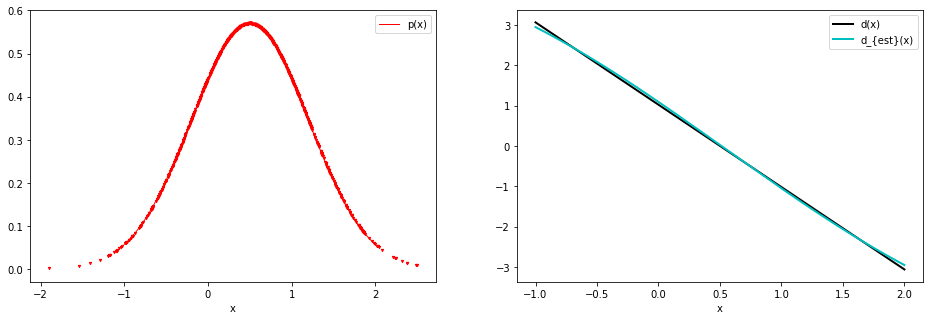

In [8]:
# draw the first figure: densities and samples
fig = plt.figure(figsize=(16,5))

ax1 = fig.add_subplot(1,2,1)

hl, = ax1.plot(t, pt, linewidth=1, color='r', zorder=1)

ax1.scatter(X, px, c=u'r', marker='v', s=5, zorder=2)

ax1.legend([hl], ['p(x)'])
plt.xlabel('x')

# draw the second figure: true and estimate density derivative ratio
ax2 = fig.add_subplot(1,2,2)

hl3, = ax2.plot(t, ddt, linewidth=2, color='k')
hl4, = ax2.plot(t, dhh[0], linewidth=2, color='c')

ax2.legend([hl3, hl4], ['d(x)', 'd_{est}(x)' ])
plt.xlabel('x')

plt.show()